### Z检验

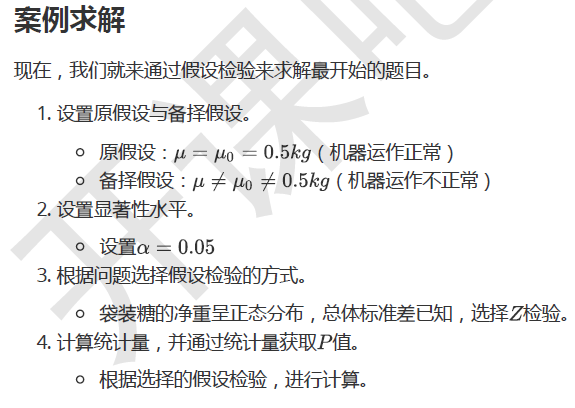

In [7]:
import numpy as np
from scipy import stats

a = np.array([0.497,0.506,0.518,0.524,0.498,0.511,0.520,0.515,0.512])
# 总体均值与标准差
mean,std = 0.5,0.015
# 计算样本均值
sample_mean = a.mean()
# 计算标准误差
se = std/np.sqrt(len(a))
# 计算Z统计量
Z = (sample_mean - mean)/se
# 计算P-Value
# stats.norm:正太分布随机变量（对象），可通过该对象获取正太分布相关的东西
# sf函数，根据参数指定的统计量，返回该统计量与右侧图像围成的面积值
# 实际上P值就是概率密度函数的面积值，即概率值
P = 2*stats.norm.sf(abs(Z))
print("P-value值：",P)

P-value值： 0.02480381963225589


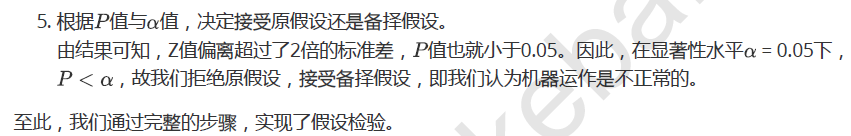

### 右边假设检验

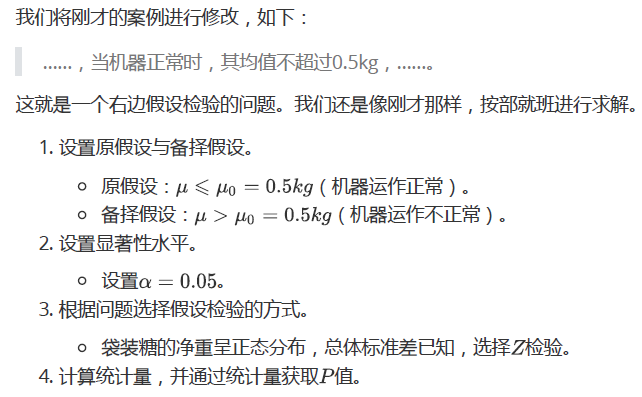

In [8]:
print(Z)
p = stats.norm.sf(Z)
print("P-value值：",p)

2.244444444444471
P-value值： 0.012401909816127946


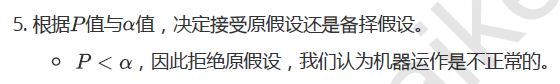

### 左边假设检验

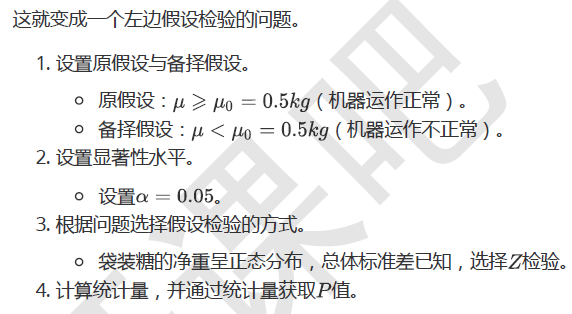

In [9]:
print(Z)
# cdf函数，根据参数指定的统计量，返回统计量与左侧图像围成的面积
p = stats.norm.cdf(Z)
print("P-value值：",p)

2.244444444444471
P-value值： 0.987598090183872


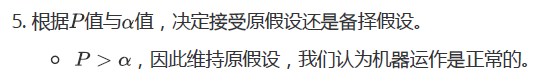

### t检验

### 单样本t检验

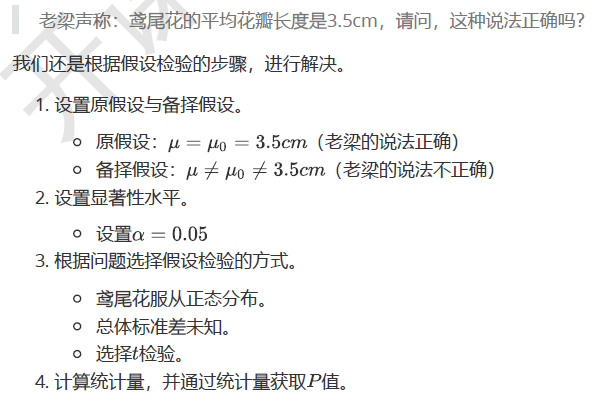

In [12]:
import numpy as py
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris

# 取出数据集
iris = load_iris()
data = pd.DataFrame(iris.data,columns=['speal_length','speal_width','petal_length','petal_width'])
data

,speal_length,speal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# 计算样本均值
mean = data['petal_length'].mean()
# 计算样本标准差
std = data['petal_length'].std()
print("样本均值：",mean)
print("样本标准差：",std)
# 计算t统计量
t = (mean - 3.5)/(std/np.sqrt(len(data)))
print("t统计量：",t)
# 计算P值
# stats.t：t分布的随机变量（对象）。通过该对象可以获取t分布的数据
# df:自由度。即变量可以自由取值的个数
p = 2*stats.t.sf(abs(t),df=len(data['petal_length']) - 1)
print("P-value值：",p)

样本均值： 3.7580000000000027
样本标准差： 1.7652982332594667
t统计量： 1.7899761687043467
P-value值： 0.07548856490783468


In [18]:
# 还可以通过scipy提供的方法来进行t检验，无需自行计算。只能检验双边检验
# 实现单样本t检验（双边检验）
# 参数1：数组数据
# 参数2：假设的总体均值
# 返回结果：Ttest_1sampResult对象，通过该对象可以获取t统计量（statistic）和P值（pvalue)
stats.ttest_1samp(data['petal_length'],3.5)

Ttest_1sampResult(statistic=1.7899761687043318, pvalue=0.07548856490783705)

#### 结论：在a=0.05下，没有充分的理由推翻原假设

### 两独立样本t检验

某市考量学生身高信息，经过抽样，分别在两所学校A和B抽取10人，测量如下
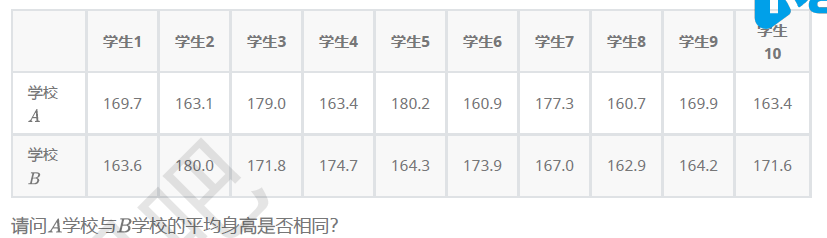

In [26]:
# A和B两个学校的学生数据
school_A = np.array([169.7,163.1,179.0,163.4,180.2,160.9,177.3,160.7,169.9,163.4])
school_B = np.array([163.6,180.0,171.8,174.7,164.3,173.9,167.0,162.9,164.2,171.6])
print(school_A.mean(),school_B.mean())
# 使用levene检验两个总体方差是否一致
# 参数：待检验的各个样本（可以超过两个）
stats.levene(school_A,school_B)

168.76000000000002 169.4


LeveneResult(statistic=0.8935070257883939, pvalue=0.35704564239172487)

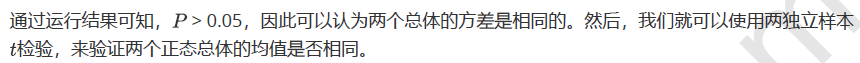

In [27]:
# 进行两独立样本t检验
# 参数1：第一个样本
# 参数2：第二个样本
# equal_var：两个样本方差是否相等，默认为true
stats.ttest_ind(school_A,school_B,equal_var=True)

Ttest_indResult(statistic=-0.21035693383354392, pvalue=0.835751946108073)

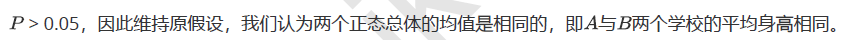

### 两配对样本t检验

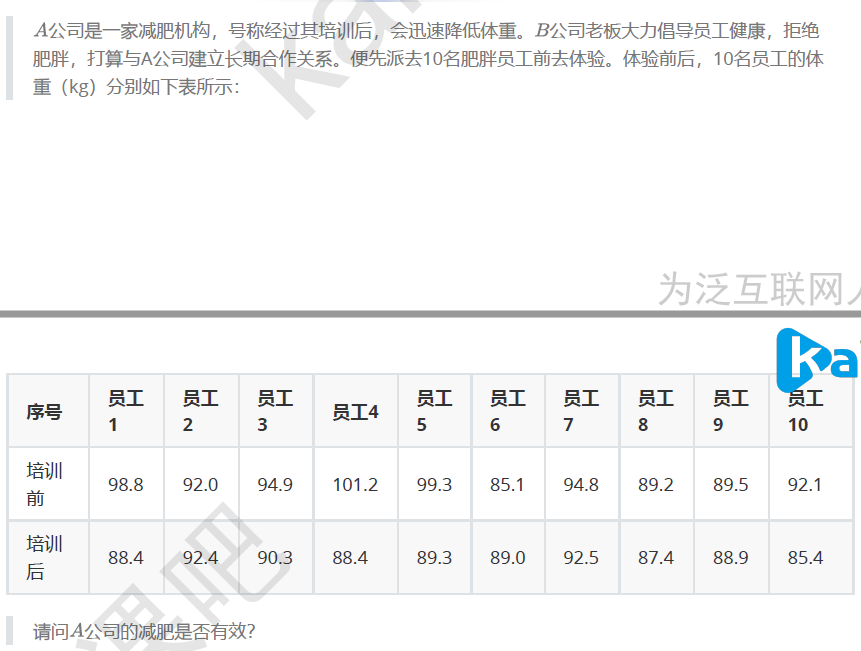

In [28]:
# 培训前体重数据
train_before = np.array([98.8,92.0,94.9,101.2,99.3,85.1,94.8,89.2,89.5,92.1])
# 培训后体重数据
train_after = np.array([88.4,92.4,90.3,88.4,89.3,89.0,92.5,87.4,88.9,85.4])
# 两配对样本t检验（双边检验）
# 参数1：第一个样本
# 参数2：第二个样本
stats.ttest_rel(train_before,train_after)

Ttest_relResult(statistic=2.6380898550618608, pvalue=0.026998188937946404)

#### 结论：p<0.05,表示两配对样本总体的差值均值不为0，即不相等，所以减肥前后，员工的体重发生了变化

### 卡方检验

### 单变量卡方检验

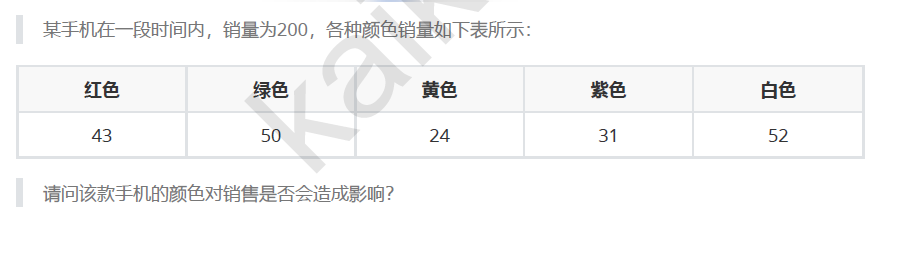

In [29]:
o = [43,50,24,31,52]
e = [40,40,40,40,40]
# 进行单个变量的卡方检验
# f_obs：每个取值的观测频数
# f_exp：每个取值的期望频数。该参数可以省略，默认所有期望的频数相等
stats.chisquare(f_obs=o,f_exp=e)

Power_divergenceResult(statistic=14.75, pvalue=0.005248836099505833)

#### 结论：p<=a,所以拒绝原假设。原假设是等值假设，即理论频数=实际频数，但p<=a,所以选择备择假设，理论频数不等于实际频数。所以该款手机的颜色对销售造成影响。

### 双变量卡方检验

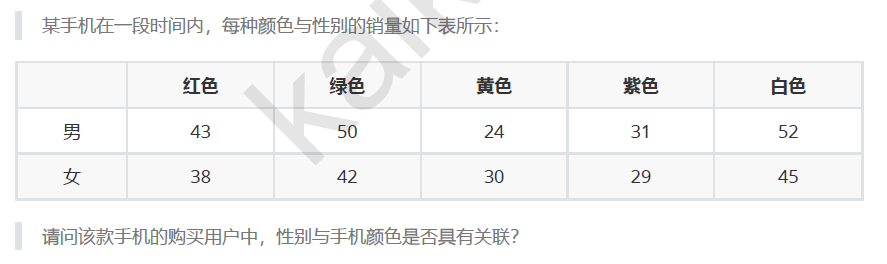

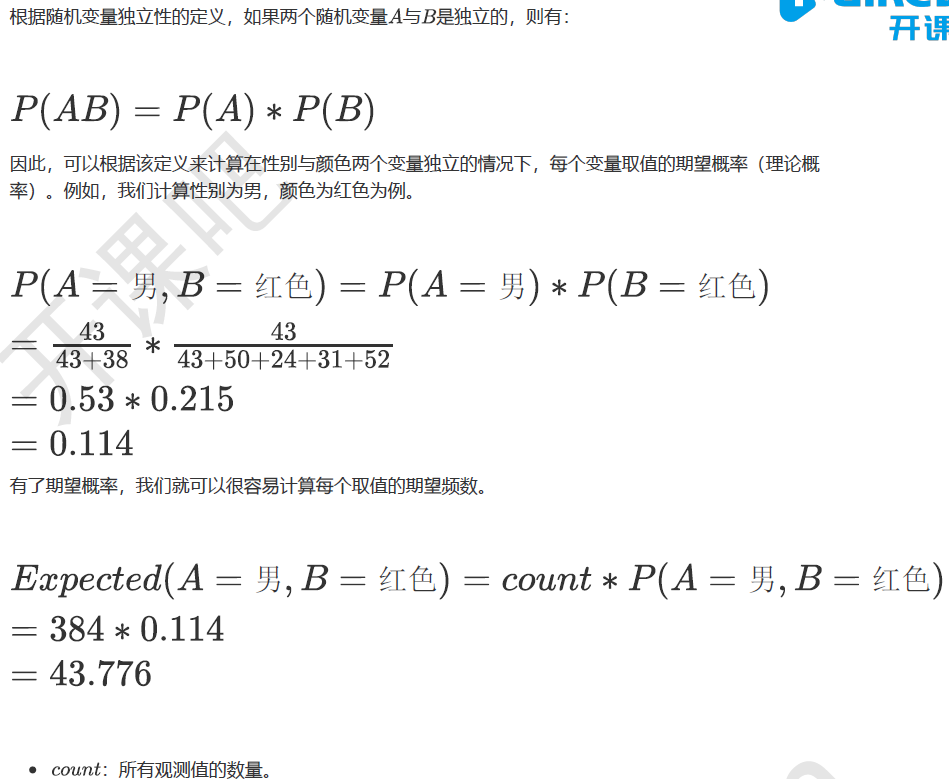

In [30]:
observer = [[43,50,24,31,52],
            [38,42,30,29,45]]
# 进行两个变量的卡方检验（列联表卡方检验）
# 参数：变量每个取值的观测频数
# 返回值是4个元素的元组类型
# 元素1：卡方统计量
# 元素2：P值
# 元素3：自由度
# 元素4：每个变量的期望取值
stats.chi2_contingency(observer)

(1.5788565254202425,
 0.8125871571557878,
 4,
 array([[42.1875    , 47.91666667, 28.125     , 31.25      , 50.52083333],
        [38.8125    , 44.08333333, 25.875     , 28.75      , 46.47916667]]))

#### p>a,所以支持原假设，即性别与手机颜色没有关联

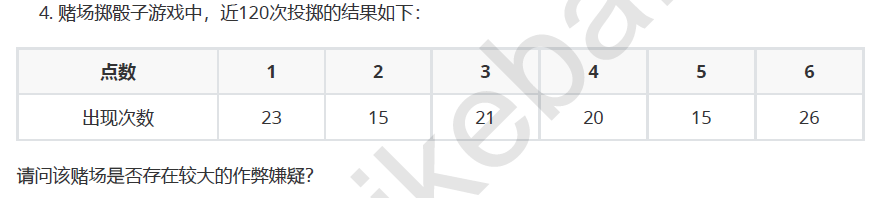

In [31]:
# 使用卡方检验
o = [23,15,21,20,15,26]
stats.chisquare(o)

Power_divergenceResult(statistic=4.8, pvalue=0.4407729680866631)

#### p>a,支持原假设。即没有充分的理由说明赌场作弊

### 比率检验

### 单总体比率检验

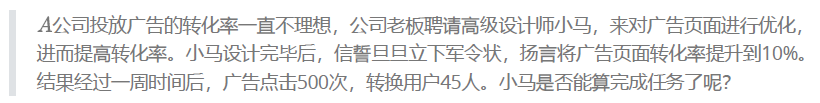

In [33]:
import numpy as np
from scipy import stats

# 样本比率
p = 45/500
# 总体比率
pi = 0.1
# 样本容量
n = 500
# 计算Z统计量
Z = (p-pi)/np.sqrt(pi*(1-pi)/n)
# 计算p值
p = stats.norm.cdf(Z)
print("Z统计量：",Z)
print("P-value值：",p)

Z统计量： -0.7453559924999305
P-value值： 0.22802827012512783


#### 结论：p>a，所以支持原假设。原假设为：广告页面提升率为10%。

### 双总体比率检验

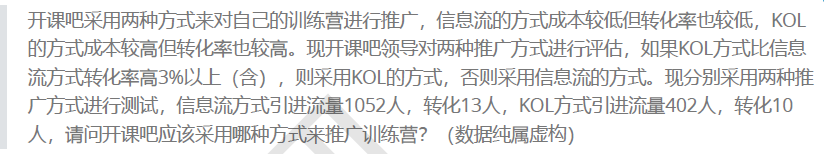

In [36]:
# 定义样本比率
p1 = 10/402
p2 = 13/1052
# 定义比率差值
d0 = 0.03
# 定义样本容量
n1 = 402
n2 = 1052
# 计算分母
denominator = np.sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2))
# 计算Z统计量
Z = (p1-p2-d0)/denominator
# 计算P值
p = stats.norm.cdf(Z)
print("Z统计量：",Z)
print("P-value值：",p)

Z统计量： -2.0610822617668627
P-value值： 0.01964759639106544


#### 结论：p<a，拒绝原假设。即没有达到3%以上

### 方差分析

### 单因素方差分析

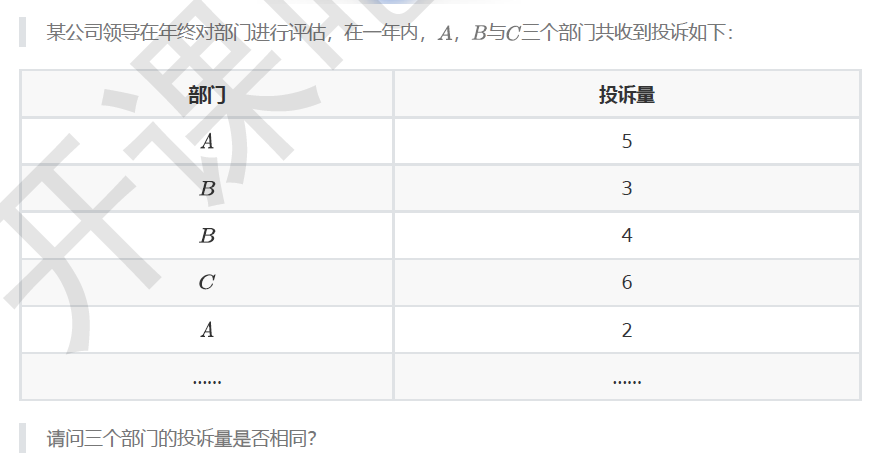

In [2]:
import numpy as np
from scipy import stats

# 设置随机种子
np.random.seed(0)
# 随机生成三个部分的投诉数据
department_a = np.random.randint(5,20,size=45)
department_b = np.random.randint(3,15,size=60)
department_c = np.random.randint(7,18,size=55)
print(department_a.mean(),department_b.mean(),department_c.mean())
# 进行levene检验，判断三个组的方差是否相等
stats.levene(department_a,department_b,department_c)

10.955555555555556 8.433333333333334 11.236363636363636


LeveneResult(statistic=0.8676117683243045, pvalue=0.42195685114672066)

In [4]:
# 进行单因素方差分析
stats.f_oneway(department_a,department_b,department_c)

F_onewayResult(statistic=10.6937138958492, pvalue=4.4261854984638516e-05)

e-05是10的-5次方的意思，所以p=4.4261854984638516*10^-5<a,所以拒绝原假设。即三个部门的投诉量很大概率是不同的